# Bike sharing Assignment: Akella Venkata Koushik

### Steps followed in this assignment:
- Reading and understanding the data
- Exploring the data through EDA and visualizations to check the trends and see for any ouliters
- Data preparation by creating dummy variables for categorical variables
- Train test data splitting
- Building the Linear model
- Evaluation of the model
- Residual analysis
- making predictions on the test data
- Model evaluation

In [72]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Step 1: Reading and Understanding the data

in this step, I will read the data and check for any missing values, duplicate data, peculiar data types present in the data

In [73]:
# Reading and checking the data 
df=pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [74]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [75]:
df.shape

(730, 16)

In [76]:
# checking for null values in the dataset
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

as we can see, there are no null values in the dataset and hence we can proceed further with the analysis

In [77]:
# checking for datatypes of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


the columns like yr, mnth, holiday, weekday are all categorical variables as understood from data dictionary and hence are of integer data

In [78]:
# checking for duplicates
df_dropped = df.drop_duplicates()
df_dropped.shape

(730, 16)

the shape of df and df_dropped are same confirming that there are no duplicate datapoints in the data set.

Now, for better visualization in EDA, I will have to prepare data by mapping the categorical variable codes with their respective names and also drop unwanted columns that don't actively contribute to the analysis

In [79]:
# dropping unwanted columns
droplist = ['instant', 'dteday', 'casual', 'registered']
df.drop(droplist, axis=1, inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [80]:
# mapping season, mnth, weekday, weathersit as these are categorical variables with more than 3 levels
df['season'] = df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df['mnth'] = df['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df['weekday'] = df['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
df['weathersit'] = df['weathersit'].map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_icerain'})

In [81]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Step 2: EDA and visualization of the data

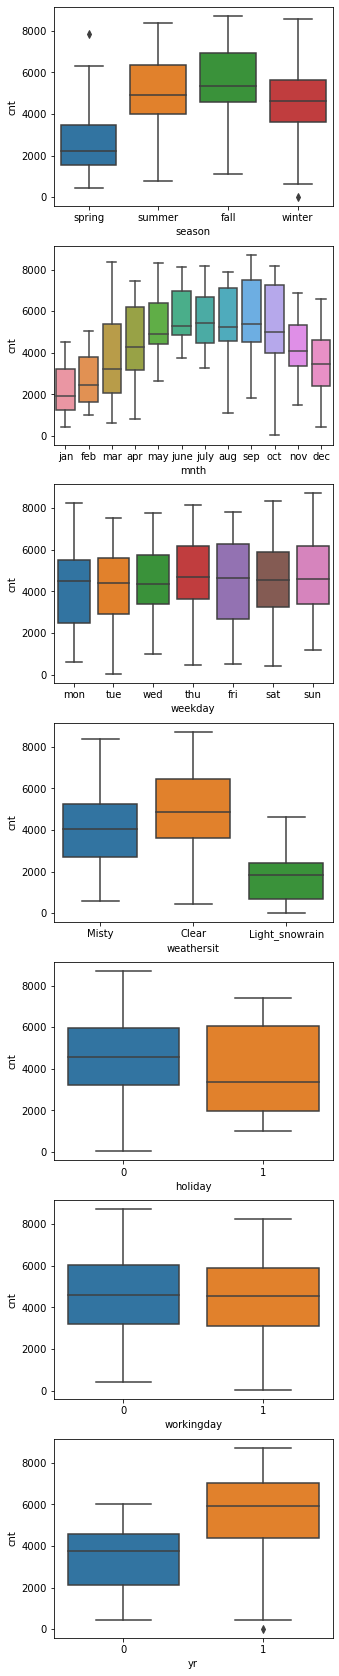

In [82]:
# checking for outliers on the categorical variables using boxplots
plt.figure(figsize=(5,30))
plt.subplot(7,1,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(7,1,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(7,1,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(7,1,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(7,1,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(7,1,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(7,1,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

except for two outliers in season box plot, no outliers are visible, the data is almost clean as evident from the boxplots

In [83]:
def bar_vs_target(column):
    sns.barplot(column, 'cnt', data=df)
    plt.title("{} vs cnt".format(column))
    plt.show()

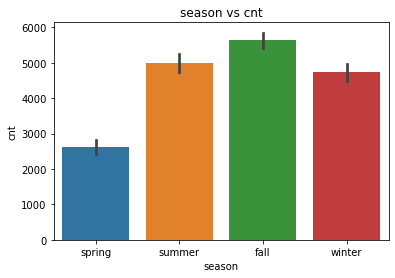

In [84]:
bar_vs_target('season')

- fall season attracts more bikers and hence has recorded higher bookings.

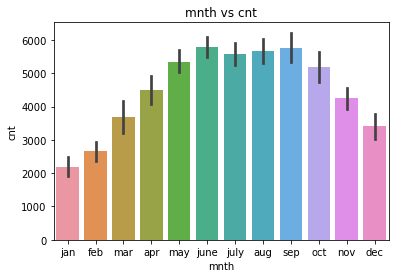

In [85]:
bar_vs_target('mnth')

- the period from May to September has seen most number of bike sharing bookings, possibly because may to june is a holiday season and hence many people might travel a lot.

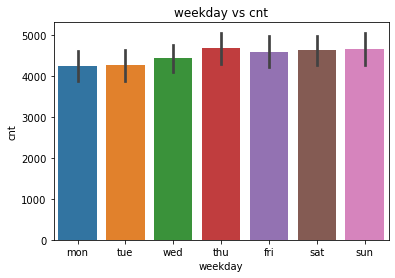

In [86]:
bar_vs_target('weekday')

- Thursday to Sunday have more bookings as compared to first three days of the week

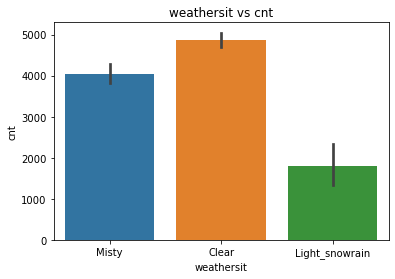

In [87]:
bar_vs_target('weathersit')

- clear weather attracts more bookings

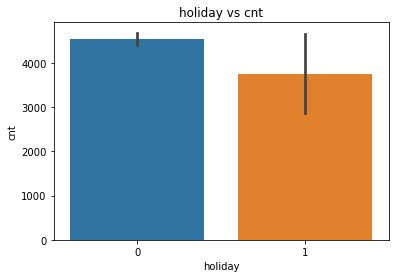

In [88]:
bar_vs_target('holiday')

- bookings are less when its not a holiday as people might like to spend time at home

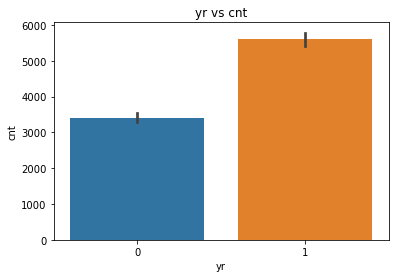

In [89]:
bar_vs_target('yr')

- 2019 has seen more bookings overall as compared to 2018

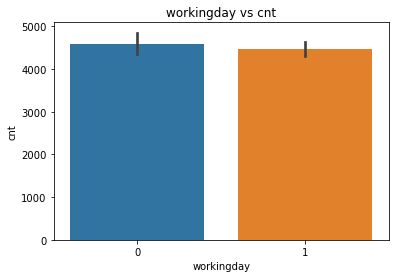

In [90]:
bar_vs_target('workingday')

- similar bookings were found whether it is a working day or not a working day

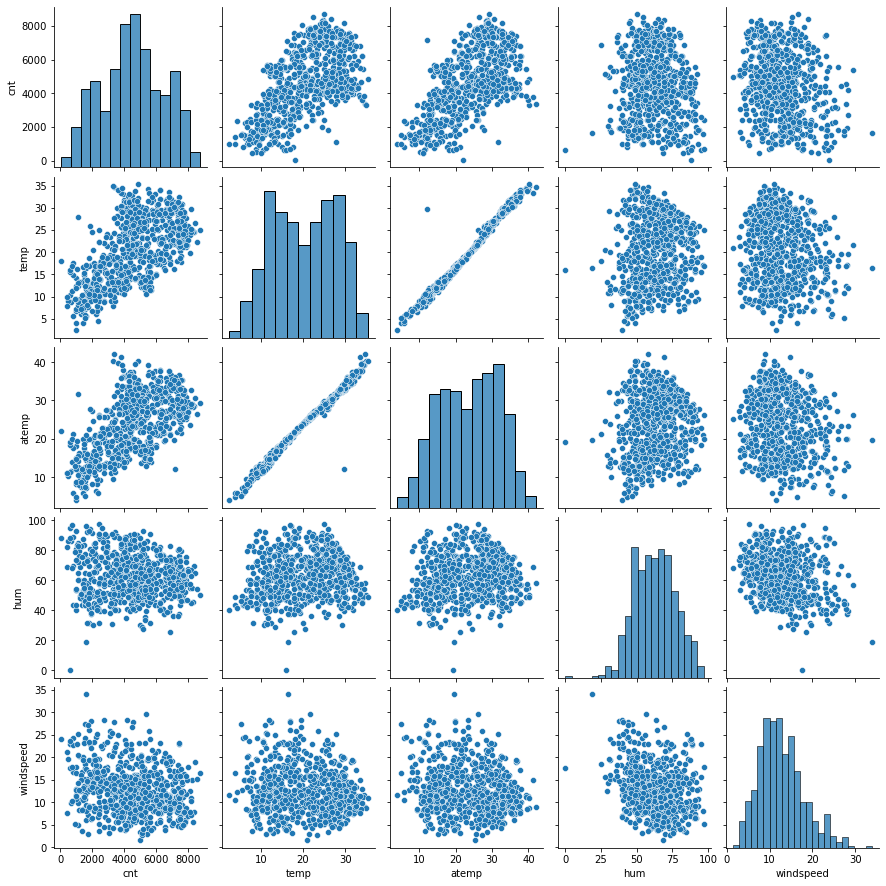

In [91]:
# visualising numerical columns variation with target variable and their variation with each other as well using pairplots
numcols = ['cnt','temp', 'atemp', 'hum', 'windspeed']
sns.pairplot(vars = numcols, data=df)
plt.show()

- temp and atemp are showing a near straight line relation as seen from the scatter plot, showing that they are too dependent on one another. also, temp and atemp are showing some sort of a positive trend with the target variable 'cnt'.

<AxesSubplot:>

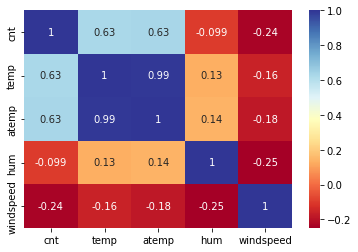

In [92]:
# heat map to check the correlations among numerical variables
sns.heatmap(df[numcols].corr(), annot=True, cmap='RdYlBu')

- temp and atemp are almost linearly related as their correlation coeff is 0.99. their multicollinearity might effect the regression model. I will check their VIF and p-values and decide accordingly whether to drop them or not.

# Step 3: Preparing the Data

In [93]:
# creating dummy variables for categorical variables having more than 3 levels
month = pd.get_dummies(df['mnth'], drop_first=True)
Season = pd.get_dummies(df['season'], drop_first=True)
Weekdays = pd.get_dummies(df['weekday'], drop_first=True)
Weathersit = pd.get_dummies(df['weathersit'], drop_first=True)

In [94]:
# concatenating dummy variable dataframes with actual df
df_new = pd.concat([df, month, Season, Weekdays, Weathersit], axis=1)

In [95]:
df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,summer,winter,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [96]:
df_new.drop(['mnth','season','weekday','weathersit'], axis=1, inplace=True)

In [97]:
df_new.shape

(730, 30)

In [98]:
df_new.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,summer,winter,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849,0.084932,0.084932,...,0.252055,0.243836,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466,0.028767,0.336986
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647,0.278971,0.278971,...,0.434490,0.429689,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767,0.167266,0.473004
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- no need to normalize the data as all the categorical variables are between 0 and 1

# Step 4: Splitting data into Train and Test sets

- from sklearn.model_selection import train_test_split
- from sklearn.preprocessing import MinMaxScaler
- from sklearn.feature_selection import RFE
- from sklearn.linear_model import LinearRegression
- from statsmodels.stats.outliers_influence import variance_inflation_factor
- import statsmodels.api as sm
- from sklearn.metrics import r2_score

In [99]:
# importing necessary libraries
from sklearn.model_selection import train_test_split

In [100]:
df_train, df_test = train_test_split(df_new, train_size=0.7, random_state=100)

In [101]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [102]:
# importing necessary libraries for scaling the numerical values of the train dataset
from sklearn.preprocessing import MinMaxScaler

In [103]:
# scaling all numerical features
scaler = MinMaxScaler()
df_train[numcols] = scaler.fit_transform(df_train[numcols])

In [104]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,summer,winter,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.247059,0.247059,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.431725,0.431725,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- as observed from the above description, all attributes are having min value as 0.00 and max value as 1.00

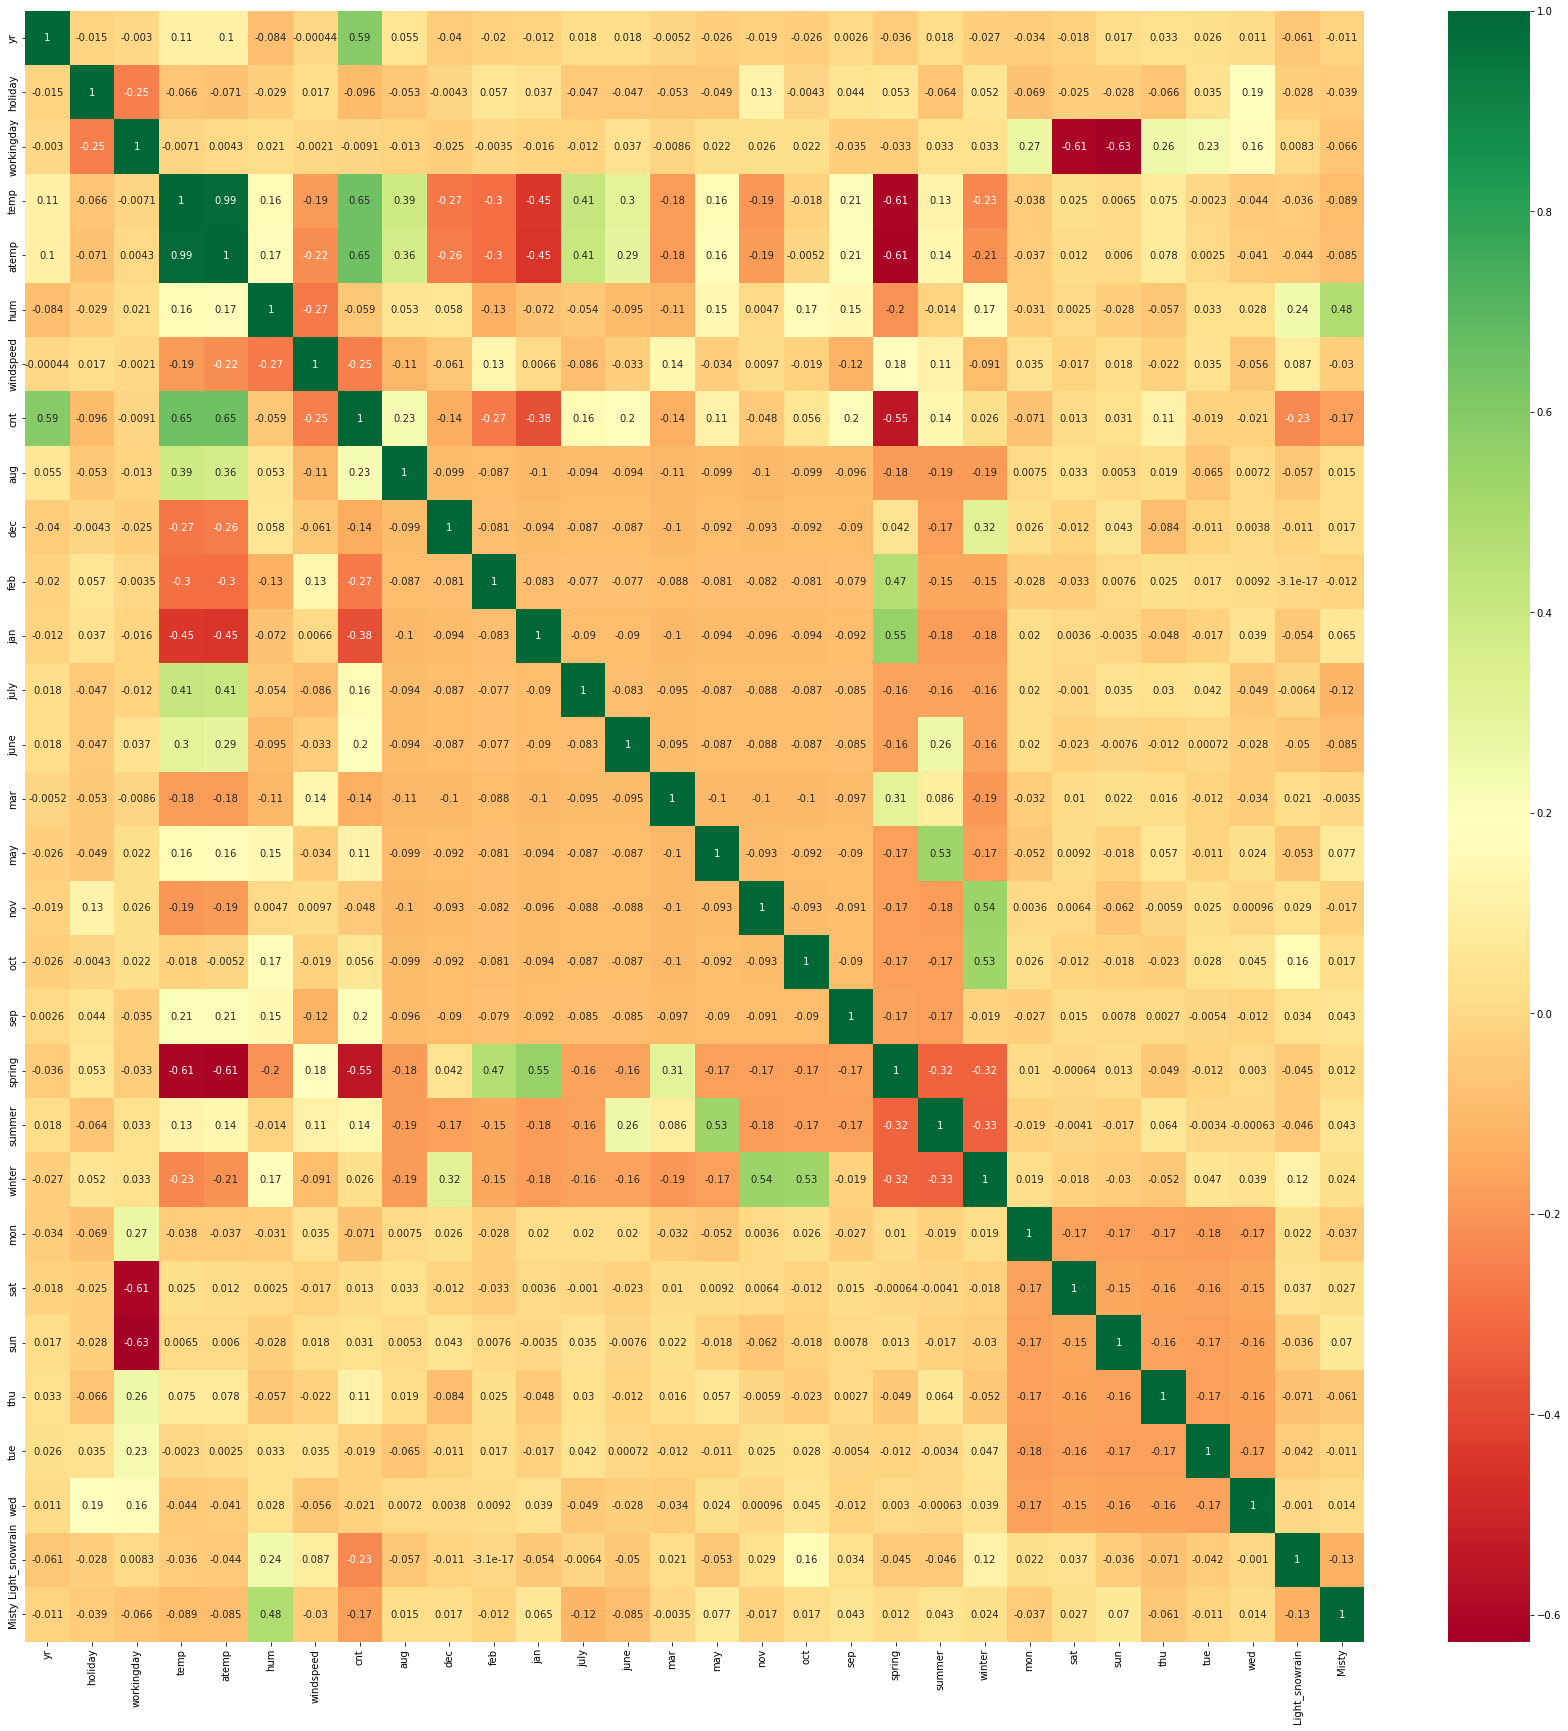

In [105]:
# plotting a correlation plot to check the correlations among all attributes
plt.figure(figsize = (30,30))
sns.heatmap(df_train.corr(), annot=True, cmap = 'RdYlGn')
plt.show()

some observations from the above heatmap
- temp and atemp are highly correlative
- oct and nov have good relation with winter month which is understandable as these are winter months
- jan and feb have good relation with spring which is acceptable as jan is the month when spring starts
- may month has a good relation with summer again is quiet obvious
- humidity has a decent relation with misty weather which is again obvious.
- target variable cnt has good relation with yr, temp and atemp.

In [106]:
y_train = df_train.pop('cnt')
x_train = df_train

# Step 5: Building the model

## Recursive feature elimination method
here I am using RFE to select features automatically for building the model

In [107]:
# importing necessary libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [108]:
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, step = 15)
rfe = rfe.fit(x_train, y_train)

In [109]:
# checking the list of attributes chosen by RFE
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 2),
 ('dec', False, 2),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', False, 2),
 ('june', False, 2),
 ('mar', False, 2),
 ('may', False, 2),
 ('nov', False, 2),
 ('oct', False, 2),
 ('sep', True, 1),
 ('spring', False, 2),
 ('summer', False, 2),
 ('winter', True, 1),
 ('mon', False, 2),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 2),
 ('tue', False, 2),
 ('wed', False, 2),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1)]

In [110]:
col = x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'jan', 'sep', 'winter', 'sat', 'sun', 'Light_snowrain', 'Misty'],
      dtype='object')

In [111]:
x_train.columns[~rfe.support_]

Index(['aug', 'dec', 'feb', 'july', 'june', 'mar', 'may', 'nov', 'oct',
       'spring', 'summer', 'mon', 'thu', 'tue', 'wed'],
      dtype='object')

In [112]:
# calculating VIF, importing variance_inflation_factor module
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [113]:
# defining a function that will contains the names of all the feature variables and their respective VIF values
def vifcal(df):
    vif = pd.DataFrame()
    vif['features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF', ascending=False)
    return vif

In [114]:
x_train_ref = x_train[col]
x_train_ref.shape

(510, 14)

In [115]:
vifcal(x_train_ref)

,features,VIF
4,atemp,356.17
3,temp,345.80
5,hum,35.54
2,workingday,30.61
11,sun,6.39
10,sat,6.08
6,windspeed,5.38
13,Misty,2.36
0,yr,2.07
1,holiday,1.76


### Building model using statsmodel, for the detailed statistics

In [116]:
# importing statsmodel api
import statsmodels.api as sm 

In [117]:
# linear model 1:
lm_1_x_train = sm.add_constant(x_train_ref)
lr_1 = sm.OLS(y_train,lm_1_x_train).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     160.7
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          7.63e-174
Time:                        23:31:22   Log-Likelihood:                 475.75
No. Observations:                 510   AIC:                            -921.5
Df Residuals:                     495   BIC:                            -858.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3005      0.082      3.

since atemp has high VIF value, we'll drop it first and see the new model

In [118]:
x_train_new = x_train_ref.drop(['atemp'], axis = 1)
vifcal(x_train_new)

,features,VIF
4,hum,35.32
2,workingday,30.41
3,temp,11.27
10,sun,6.35
9,sat,6.07
5,windspeed,5.23
12,Misty,2.36
0,yr,2.07
1,holiday,1.76
8,winter,1.73


In [119]:
# linear model 2:
lm_2_x_train = sm.add_constant(x_train_new)
lr_2 = sm.OLS(y_train,lm_2_x_train).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     173.2
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          8.09e-175
Time:                        23:31:23   Log-Likelihood:                 475.39
No. Observations:                 510   AIC:                            -922.8
Df Residuals:                     496   BIC:                            -863.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3024      0.082      3.

'hum' still has high vif so we can drop is as well and see how new model looks like

In [120]:
x_train_new = x_train_new.drop(['hum'], axis = 1)
vifcal(x_train_new)

,features,VIF
2,workingday,14.94
3,temp,10.27
4,windspeed,4.97
9,sun,3.69
8,sat,3.52
0,yr,2.06
7,winter,1.66
11,Misty,1.58
5,jan,1.54
1,holiday,1.35


In [121]:
# linear model 3:
lm_3_x_train = sm.add_constant(x_train_new)
lr_3 = sm.OLS(y_train,lm_3_x_train).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     182.2
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          3.11e-173
Time:                        23:31:24   Log-Likelihood:                 468.90
No. Observations:                 510   AIC:                            -911.8
Df Residuals:                     497   BIC:                            -856.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2102      0.079      2.

'workingday' still has high vif value and hence can be dropped

In [122]:
x_train_new = x_train_new.drop(['workingday'], axis = 1)
vifcal(x_train_new)

,features,VIF
2,temp,3.70
3,windspeed,3.17
0,yr,2.03
10,Misty,1.52
6,winter,1.29
8,sun,1.19
4,jan,1.18
7,sat,1.17
5,sep,1.16
9,Light_snowrain,1.08


In [123]:
# linear model 4:
lm_4_x_train = sm.add_constant(x_train_new)
lr_4 = sm.OLS(y_train,lm_4_x_train).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     199.1
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          2.34e-174
Time:                        23:31:24   Log-Likelihood:                 468.82
No. Observations:                 510   AIC:                            -913.6
Df Residuals:                     498   BIC:                            -862.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1790      0.020      8.

since vif values of all attributes are <5, now we can drop variable 'sat' having high p-value

In [124]:
x_train_new = x_train_new.drop(['sat'], axis = 1)
vifcal(x_train_new)

,features,VIF
2,temp,3.61
3,windspeed,3.17
0,yr,2.03
9,Misty,1.52
6,winter,1.29
4,jan,1.17
5,sep,1.16
7,sun,1.16
8,Light_snowrain,1.08
1,holiday,1.04


In [125]:
# linear model 5:
lm_5_x_train = sm.add_constant(x_train_new)
lr_5 = sm.OLS(y_train,lm_5_x_train).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     218.6
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          3.30e-175
Time:                        23:31:25   Log-Likelihood:                 468.03
No. Observations:                 510   AIC:                            -914.1
Df Residuals:                     499   BIC:                            -867.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1811      0.020      8.

'sun' has high p-value and hence can be dropped

In [126]:
x_train_new = x_train_new.drop(['sun'], axis = 1)
vifcal(x_train_new)

,features,VIF
2,temp,3.57
3,windspeed,3.15
0,yr,2.03
8,Misty,1.50
6,winter,1.29
4,jan,1.17
5,sep,1.16
7,Light_snowrain,1.08
1,holiday,1.04


In [127]:
# linear model 6:
lm_6_x_train = sm.add_constant(x_train_new)
lr_6 = sm.OLS(y_train,lm_6_x_train).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     242.3
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          5.27e-176
Time:                        23:31:26   Log-Likelihood:                 467.07
No. Observations:                 510   AIC:                            -914.1
Df Residuals:                     500   BIC:                            -871.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1831      0.020      9.

<b> as we can see from the above model, the p-values of all the variables are 0.00 which means all the variables are significant. further, the R-squared value is 81.3% which is pretty good. prob(F-statistic) is also very low. hence this model is a good model that I arrived at! <b>

# Step 6: Residual analysis

In [128]:
lm_6_x_train.head()

,const,yr,holiday,temp,windspeed,jan,sep,winter,Light_snowrain,Misty
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,0,1
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,0,1
111,1.0,0,0,0.345824,0.380981,0,0,0,0,1


In [129]:
y_test_pred = lr_6.predict(lm_6_x_train)

Text(0.5, 0, 'Errors')

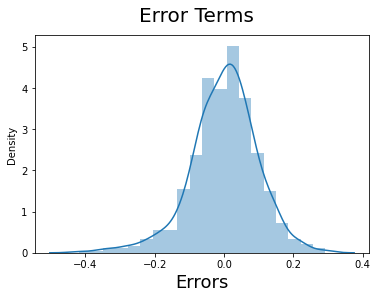

In [130]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

As observed from the graph, the error terms are following a Normal distribution

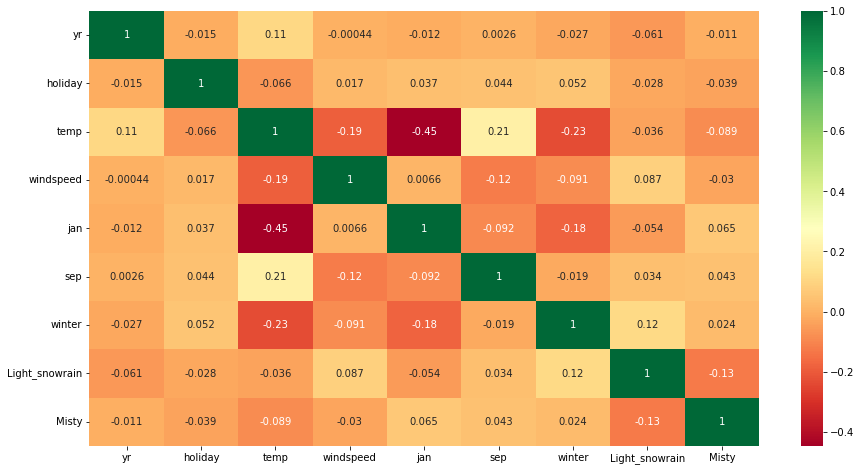

In [131]:
# checking for multicollinearity among final variables
plt.figure(figsize=(15,8))
sns.heatmap(x_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

There is no correlation observed among the variables which is very good

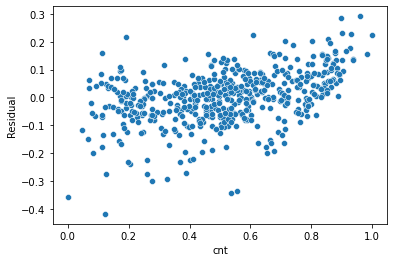

In [146]:
# doing a homoscedasticity test
y_train_pred = lr_6.predict(lm_6_x_train)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.xlabel('cnt')
plt.ylabel('Residual')
plt.show()

# Step 7: Making Predictions on Test data

In [134]:
# scaling the test data
df_test[numcols] = scaler.transform(df_test[numcols])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,summer,winter,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,1,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,1,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,1,0,0,1,0,0,0,0,0,0


In [135]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,summer,winter,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.263636,0.236364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.441609,0.425817,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [136]:
y_test = df_test.pop('cnt')
x_test = df_test

In [137]:
# Creating X_test_new dataframe by dropping variables from X_test
x_test_new = x_test[x_train_new.columns]

# Adding a constant variable 
x_test_new = sm.add_constant(x_test_new)

In [138]:
y_test_pred = lr_6.predict(x_test_new)

In [139]:
# importing r2_score module for evaluating the r2_score of the model on the test dataset
from sklearn.metrics import r2_score

In [140]:
r2_test = r2_score(y_test, y_test_pred)
round(r2_test,4)

0.7693

# Step 8: Model evaluation

Text(0, 0.5, 'y_test_pred')

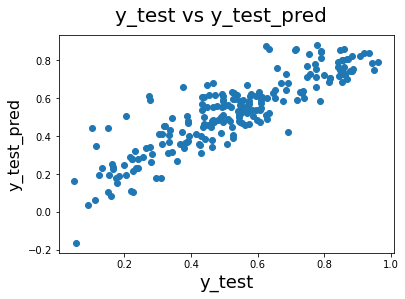

In [141]:
# Plotting a scatter plot between y_test and y_test_pred to understand the distribution of the points and to see for any trends

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16) 

In [142]:
lr_6.params

const             0.183064
yr                0.234473
holiday          -0.103266
temp              0.512295
windspeed        -0.150740
jan              -0.080650
sep               0.074521
winter            0.086490
Light_snowrain   -0.285888
Misty            -0.071863
dtype: float64

In [143]:
# lets find out the Adjusted-r2 value for the test dataset

adj_r2 = round(1-(1-r2_test)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1),4)
print(adj_r2)

0.7341


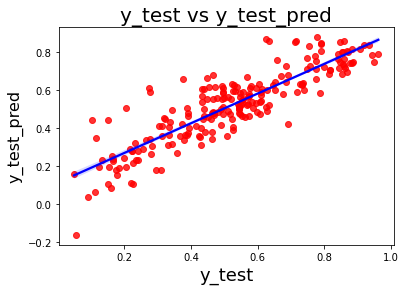

In [144]:
# trying to find the best fit line by plotting it on the scatter plot
plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.title('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)
plt.show()

# Final observations from my assignment
- R^2 value on train dataset = 0.813
- adjusted-R^2 value on train dataset = 0.810
- R^2 value on test dataset = 0.769
- adjusted-R^2 value on test dataset = 0.734

### ******* The End *******